In [186]:
# Tanvi Malhotra
# Tejveer Singh 
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance
from sklearn.manifold import MDS

In [187]:
class Cifar():
    
    def __init__(self):
        return

    def unpickle(self,file_name):
           
            if file_name=='batches.meta':
                
                with open(file_name, 'rb') as fo:
                    dict = pickle.load(fo, encoding='Utf-8')
                
            else:
                with open(file_name, 'rb') as fo:
                    dict = pickle.load(fo, encoding='bytes')
            return dict

    def data_preprocessing(self,file_name):
        
            if file_name=='batches.meta':
                     labels=self.unpickle(file_name)
                     return labels['label_names']
                
            data_cifar=self.unpickle(file_name)
            return data_cifar[b'data'],data_cifar[b'labels']
    
    def concatenate(self,A,B,C,D,E):
        return np.concatenate((A,B,C,D,E),axis=0)
    
    
    def individual_dataset(self,X,Y,i):
        Data=np.concatenate((X,Y),axis=1)
        return Data[Data[:,-1]==i]
    
    def calculate_inverse_transform(self,dataset):
                pca=PCA(n_components=20,random_state=3)
                dataset_transform=pca.fit_transform(dataset)
                reconstruction=pca.inverse_transform(dataset_transform)
                return reconstruction
   
    def mean_square_error(self,dataset):
                reconstruction=self.calculate_inverse_transform(dataset)
                return np.sum((dataset-reconstruction)**2)/50000
            
    def euclidian_distance(self,matrix):
                return distance.cdist(matrix,matrix)

In [188]:
Obj=Cifar()

In [189]:
data1,label1=Obj.data_preprocessing('data_batch_1')
data2,label2=Obj.data_preprocessing('data_batch_2')
data3,label3=Obj.data_preprocessing('data_batch_3')
data4,label4=Obj.data_preprocessing('data_batch_4')
data5,label5=Obj.data_preprocessing('data_batch_5')

In [190]:
X_train=Obj.concatenate(data1,data2,data3,data4,data5)
Y_train=Obj.concatenate(label1,label2,label3,label4,label5)



In [191]:
X_train.shape

(50000, 3072)

In [192]:
Y_train=Y_train.reshape(50000,1)

In [193]:
Y_train.shape


(50000, 1)

In [194]:
lst=Obj.data_preprocessing('batches.meta')
lst

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Part A

In [195]:
class1=Obj.individual_dataset(X_train,Y_train,0)
class2=Obj.individual_dataset(X_train,Y_train,1)
class3=Obj.individual_dataset(X_train,Y_train,2)
class4=Obj.individual_dataset(X_train,Y_train,3)
class5=Obj.individual_dataset(X_train,Y_train,4)
class6=Obj.individual_dataset(X_train,Y_train,5)
class7=Obj.individual_dataset(X_train,Y_train,6)
class8=Obj.individual_dataset(X_train,Y_train,7)
class9=Obj.individual_dataset(X_train,Y_train,8)
class10=Obj.individual_dataset(X_train,Y_train,9)

In [196]:
class1.shape

(5000, 3073)

In [197]:
class1=class1[:,0:3072]
class2=class2[:,0:3072]
class3=class3[:,0:3072]
class4=class4[:,0:3072]
class5=class5[:,0:3072]
class6=class6[:,0:3072]
class7=class7[:,0:3072]
class8=class8[:,0:3072]
class9=class9[:,0:3072]
class10=class10[:,0:3072]
classes=[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]

In [198]:
mean_square_error=[]
for i in range(10):
    mean_square_error.append(Obj.mean_square_error(classes[i]))

In [199]:
mean_square_error

[262947.9293493409,
 394635.1627460181,
 243210.84401927656,
 310613.0446493819,
 218190.74170815904,
 323025.7279705301,
 262341.4692129095,
 342446.20514401776,
 243864.8860118686,
 402437.4065530691]

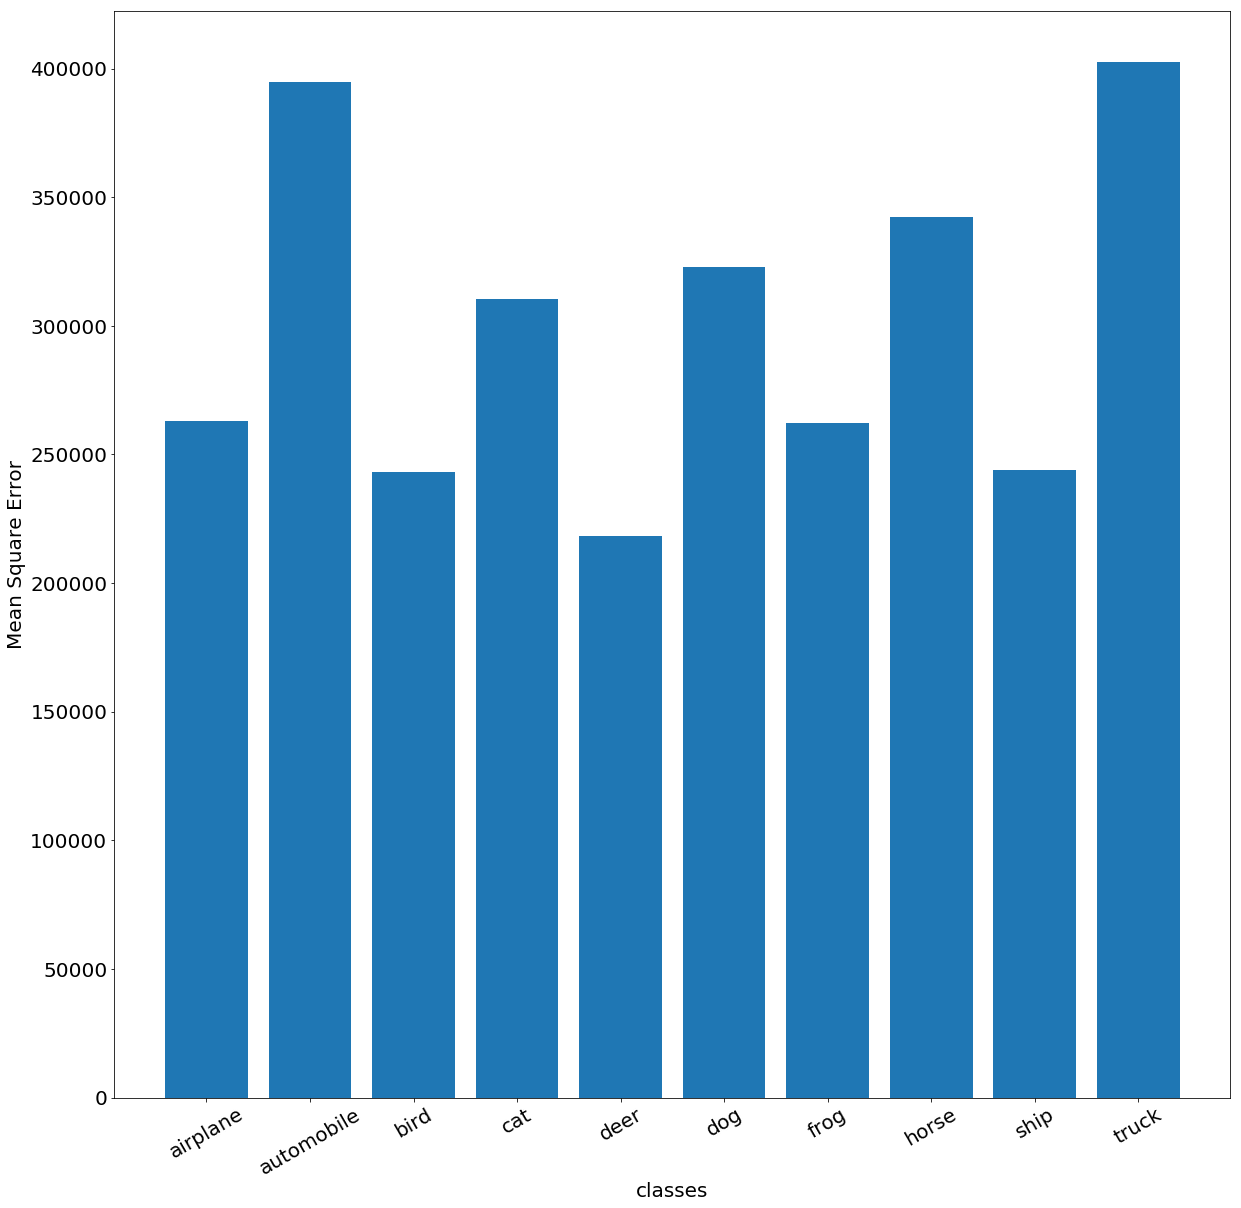

In [200]:
plt.figure(figsize=(20,20))
plt.bar(lst,mean_square_error)
plt.xlabel("classes",fontsize=20)
plt.ylabel("Mean Square Error",fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=30)
plt.show()

# Part B 

In [201]:
class1_mean=np.mean(class1,axis=0).reshape(1,-1)
class2_mean=np.mean(class2,axis=0).reshape(1,-1)
class3_mean=np.mean(class3,axis=0).reshape(1,-1)
class4_mean=np.mean(class4,axis=0).reshape(1,-1)
class5_mean=np.mean(class5,axis=0).reshape(1,-1)
class6_mean=np.mean(class6,axis=0).reshape(1,-1)
class7_mean=np.mean(class7,axis=0).reshape(1,-1)
class8_mean=np.mean(class8,axis=0).reshape(1,-1)
class9_mean=np.mean(class9,axis=0).reshape(1,-1)
class10_mean=np.mean(class10,axis=0).reshape(1,-1)

In [202]:
class_mean=[class1_mean,class2_mean,class3_mean,class4_mean,class5_mean,class6_mean,class7_mean,class8_mean,class9_mean,class10_mean]

In [203]:
matrix=np.concatenate((class_mean),axis=0)

In [204]:
matrix=Obj.euclidian_distance(matrix)
matrix.shape

(10, 10)

In [208]:
mds=MDS(n_components=2,dissimilarity='precomputed',random_state=1)

In [209]:
mds_transform=mds.fit_transform(matrix)

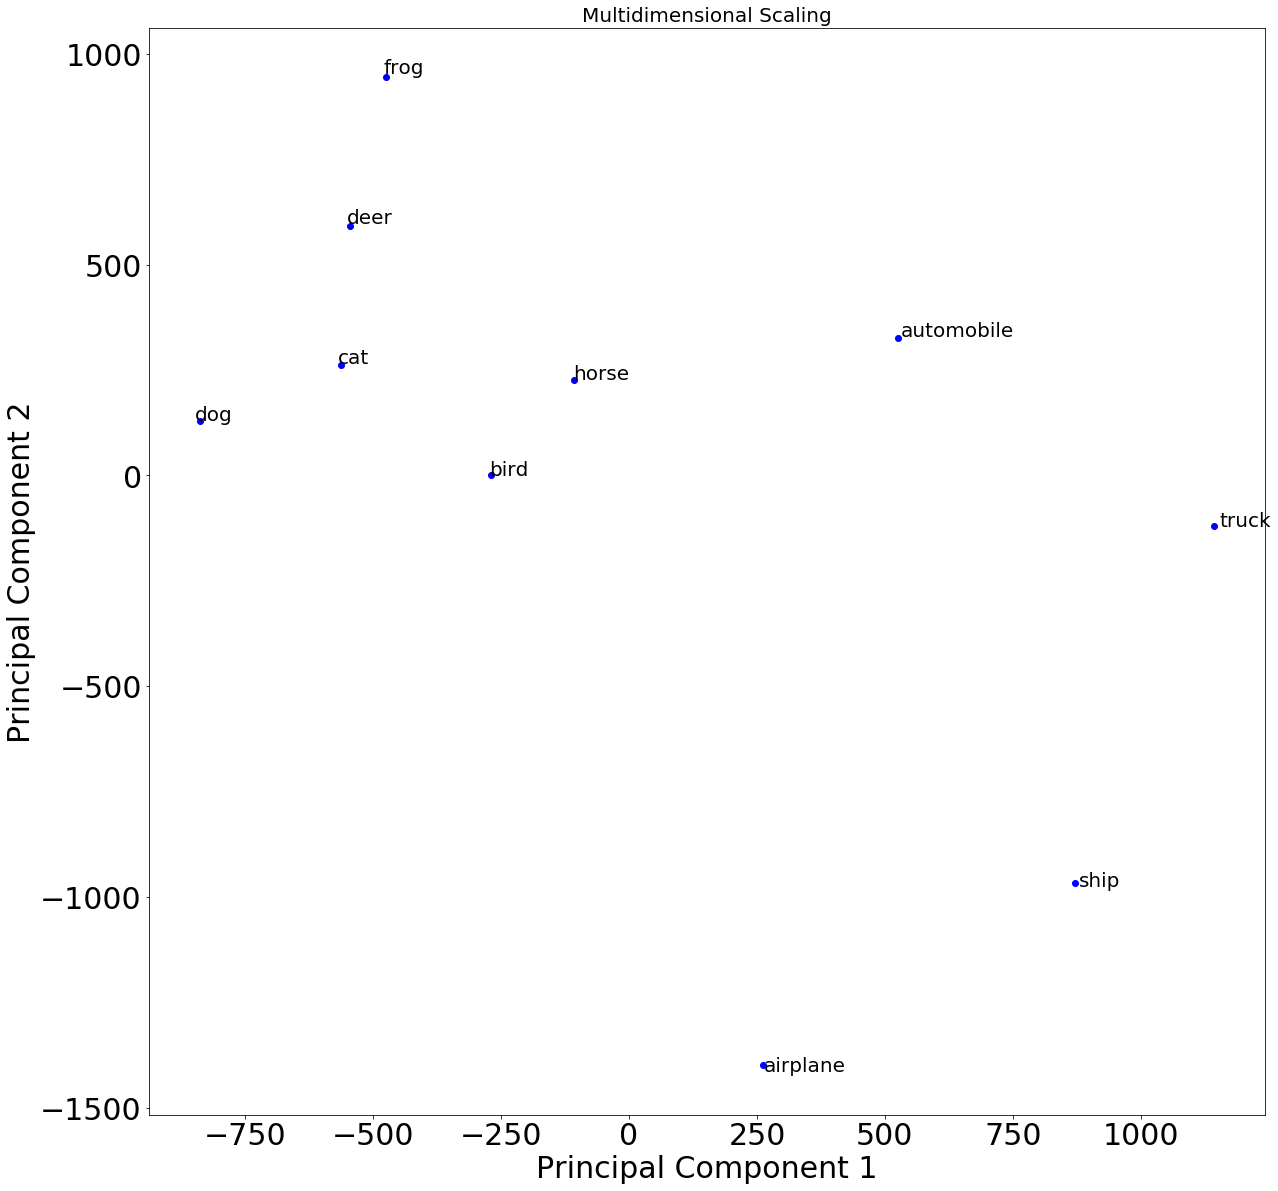

In [210]:
plt.figure(figsize=(20,20))
plt.title("Multidimensional Scaling",fontsize=20)

for i in range(len(mds_transform)):
    x = mds_transform[i][0]
    y = mds_transform[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) ,lst[i], fontsize=20)


#plt.scatter(matrix_transform[:,0],matrix_transform[:,1])
plt.xlabel("Principal Component 1",fontsize=30)
plt.ylabel("Principal Component 2",fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()